### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [7]:
import pandas as pd 

data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/No supervisado/Clustering/Practica/data/drugLibTrain_raw.tsv', sep='\t') 
data 

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Inspeccionamos las primeras filas para tener una idea de las columnas
print(data.head()) 

   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that

In [9]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None


In [12]:
# Filtramos las columnas numéricas y categóricas con menos de 10 categorías
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = [col for col in data.select_dtypes(include=['object']).columns if data[col].nunique() < 10] 
categorical_cols

['effectiveness', 'sideEffects']

In [13]:
# Creamos un nuevo DataFrame con las columnas seleccionadas
selected_cols = list(numerical_cols) + categorical_cols
data_selected = data[selected_cols] 
data_selected 

,Unnamed: 0,rating,effectiveness,sideEffects
0,2202,4,Highly Effective,Mild Side Effects
1,3117,1,Highly Effective,Severe Side Effects
2,1146,10,Highly Effective,No Side Effects
3,3947,3,Marginally Effective,Mild Side Effects
4,1951,2,Marginally Effective,Severe Side Effects
...,...,...,...,...
3102,1039,10,Highly Effective,Mild Side Effects
3103,3281,1,Ineffective,Extremely Severe Side Effects
3104,1664,2,Marginally Effective,Moderate Side Effects
3105,2621,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [15]:
data_encoded = pd.get_dummies(data_selected, columns=categorical_cols, drop_first=True) 
data_encoded 

,Unnamed: 0,rating,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,2202,4,True,False,False,False,True,False,False,False
1,3117,1,True,False,False,False,False,False,False,True
2,1146,10,True,False,False,False,False,False,True,False
3,3947,3,False,False,True,False,True,False,False,False
4,1951,2,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
3102,1039,10,True,False,False,False,True,False,False,False
3103,3281,1,False,True,False,False,False,False,False,False
3104,1664,2,False,False,True,False,False,True,False,False
3105,2621,8,False,False,False,False,True,False,False,False


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [17]:
range_n_clusters = list(range(2, 11))
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_encoded)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data_encoded, cluster_labels)) 
    silhouette_avg 

In [18]:
# Identificar el mejor número de clusters (K)
best_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print(f"La mejor K es: {best_k}")

La mejor K es: 2


In [20]:
# Entrenar el modelo KMeans con la mejor K
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(data_encoded)
data_encoded['cluster'] = kmeans.labels_ 
data_encoded['cluster'] 

0       0
1       0
2       1
3       0
4       1
       ..
3102    1
3103    0
3104    1
3105    0
3106    0
Name: cluster, Length: 3107, dtype: int32

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [21]:
cluster_counts = data_encoded['cluster'].value_counts() 

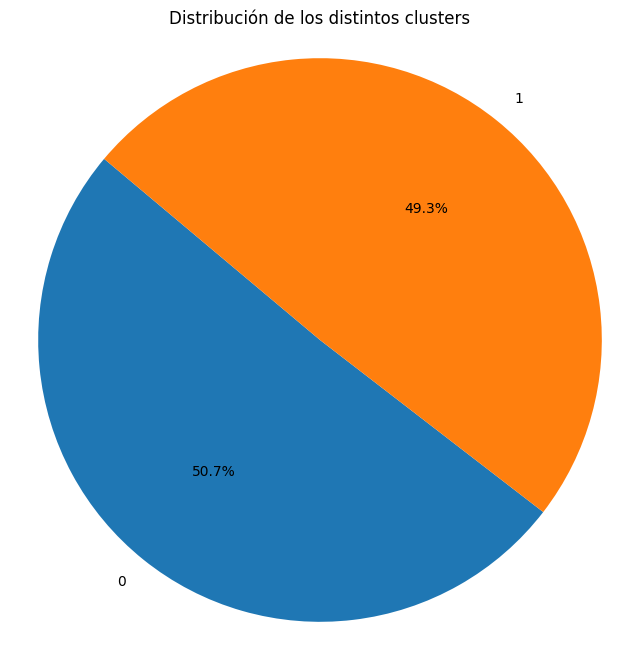

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los distintos clusters')
plt.axis('equal')
plt.show() 